<h1>PCA with Iris data</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

<h2>Get Iris data and scale</h2>

In [4]:
iris = sns.load_dataset('iris')
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
)

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

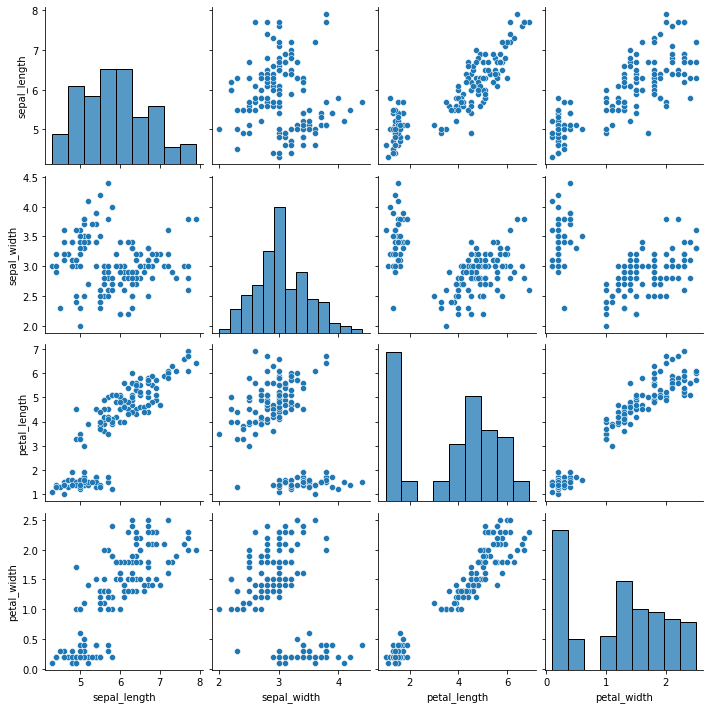

In [5]:
sns.pairplot(iris)

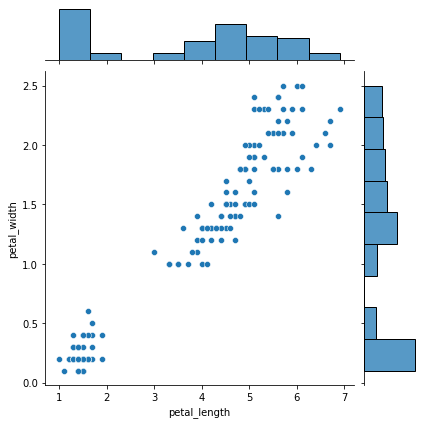

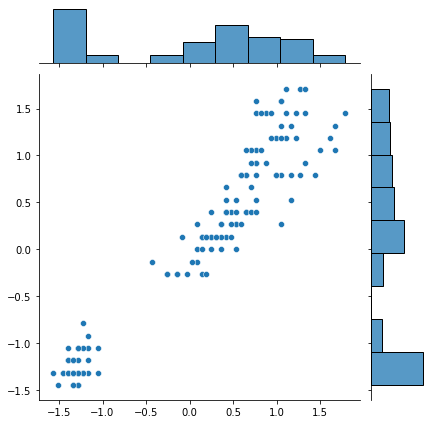

In [6]:
sns.jointplot(x=iris['petal_length'], y=iris['petal_width'])
sns.jointplot(x=scaled[:,2], y=scaled[:,3])

<h2>Get Eigenvalues and Eigenvectors</h2>

In [7]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [8]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [9]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

<h3>% of variance</h3>

In [11]:
variance_explained = list()
for elem in eigen_values:
    variance_explained.append( (elem/sum(eigen_values))*100 )
print(variance_explained)

[72.96244541329987, 22.850761786701757, 3.6689218892828825, 0.5178709107154802]


<h2>PCA: Two principal components</h2>

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [14]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

<h3>Two principal components % variance</h3>

In [18]:
0.72962445 +  0.22850762

0.95813207

In [17]:
reduced_scaled = pca.transform(scaled)

In [20]:
iris['pca_1'] = scaled[:,0]
iris['pca_2'] = scaled[:,1]

In [21]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-0.900681,1.019004
1,4.9,3.0,1.4,0.2,setosa,-1.143017,-0.131979
2,4.7,3.2,1.3,0.2,setosa,-1.385353,0.328414
3,4.6,3.1,1.5,0.2,setosa,-1.506521,0.098217
4,5.0,3.6,1.4,0.2,setosa,-1.021849,1.249201


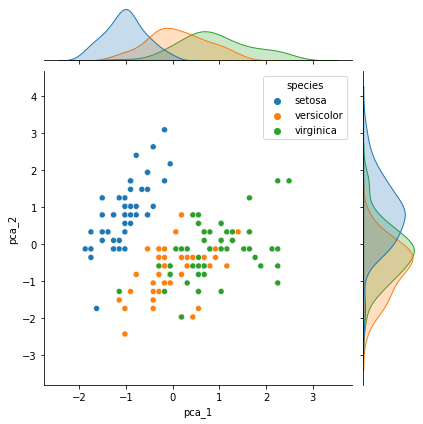

In [23]:
sns.jointplot(x=iris['pca_1'], y=iris['pca_2'], hue=iris['species'])